## APPLE MOBILITY TRENDS ACROSS THE WORLD (Jan to Apr) - COVID 19 impact on Mobility

COVID 19 cases began surfacing around January, and increasing every day. This dataset can be used to study impacts on mobility in this COVID 19 period 

Due to COVID 19 spreading all across the world, there have been strict measures taken by the Governments of various Countries. Due to this people's mobility has also reduced across regions.
The given dataset is an Apple provided mobility report (across transportation types such as `walking`, `driving`, `transit`.

    How the mobility of people carrying the Apple mobile phones has changes, provides us an opportunity to study the mobility behaviors across the regions.
    
In this notebook, we shall do some EDA on this data to understand how the nations/regions followed some strict lockdown measures imposed by the governement, and how was the distribution of decreased mobility across different transport types. We will plot the population mobility (population using Apple product) to understand whether lockdown restrictions were abided by people of those regions.

Further Work:
This dataset can be further used for making judgments in taking decisions or actions, as to which region is more vulnerable to become a hotspot (If the mobility of a city/ region is increasing suddenly, that would mean that the chances of COVID 19 spreading would increase, and government would require to take best measures to control this mobility).

Limitation: The dataset comes from Apple's product mobility, and hence the inferences would represent only fraction of the people who use Apple products. This becomes even more limiting in making inferences for regions, where Apple products do not have enough reach - this will result in very less data from that region.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
apple = pd.read_csv('../input/apples-mobility-report/Copy of applemobilitytrends-2020-04-14.csv')
apple.head()

,geo_type,region,transportation_type,1/13/2020,1/14/2020,1/15/2020,1/16/2020,1/17/2020,1/18/2020,1/19/2020,...,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,22.54,26.40,26.03,26.43,26.70,26.32,25.47,24.89,32.64,31.43
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,23.92,31.13,25.80,29.81,28.96,27.29,27.63,29.59,35.52,38.08
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,11.53,17.24,18.55,19.95,19.80,16.80,19.40,12.89,21.10,22.29
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,9.12,11.85,13.49,15.51,14.65,13.58,15.75,10.45,16.35,16.66
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,51.75,53.17,55.01,59.24,33.19,36.00,26.95,31.72,53.14,55.91


In [3]:
apple.shape

(395, 96)

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 96 columns):
geo_type               395 non-null object
region                 395 non-null object
transportation_type    395 non-null object
1/13/2020              395 non-null int64
1/14/2020              395 non-null float64
1/15/2020              395 non-null float64
1/16/2020              395 non-null float64
1/17/2020              395 non-null float64
1/18/2020              395 non-null float64
1/19/2020              395 non-null float64
1/20/2020              395 non-null float64
1/21/2020              395 non-null float64
1/22/2020              395 non-null float64
1/23/2020              395 non-null float64
1/24/2020              395 non-null float64
1/25/2020              395 non-null float64
1/26/2020              395 non-null float64
1/27/2020              395 non-null float64
1/28/2020              395 non-null float64
1/29/2020              395 non-null float64
1/30/2020           

In [5]:
apple.describe()

,1/13/2020,1/14/2020,1/15/2020,1/16/2020,1/17/2020,1/18/2020,1/19/2020,1/20/2020,1/21/2020,1/22/2020,...,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020
count,395.0,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,100.0,102.051367,104.575949,107.315089,118.304886,116.855418,96.516025,102.030506,104.140861,105.272911,...,36.495747,39.549519,40.279013,40.748127,39.436152,39.566937,36.836304,32.842278,37.042734,39.554329
std,0.0,4.074084,6.255253,7.713471,13.879839,22.067678,14.519740,9.793529,9.770959,9.003694,...,21.245849,20.336866,20.280418,20.655334,19.994238,21.398051,19.191664,17.313402,17.746450,18.393675
min,100.0,90.140000,73.720000,74.530000,83.960000,69.280000,43.790000,72.900000,69.790000,78.250000,...,3.780000,5.450000,5.800000,5.780000,5.480000,4.460000,4.910000,4.130000,4.470000,6.530000
25%,100.0,99.860000,101.205000,102.705000,108.080000,100.310000,86.675000,97.340000,99.070000,99.900000,...,19.370000,23.420000,23.840000,23.400000,22.575000,22.455000,20.960000,18.410000,22.395000,23.550000
50%,100.0,101.780000,104.190000,106.870000,117.780000,114.840000,97.880000,101.210000,102.930000,104.320000,...,33.360000,37.300000,38.130000,38.930000,36.880000,35.990000,34.530000,31.690000,36.540000,38.910000
75%,100.0,104.045000,107.030000,110.265000,127.260000,129.935000,105.955000,104.810000,107.625000,109.030000,...,47.640000,52.660000,53.520000,55.315000,52.910000,51.985000,49.595000,43.520000,47.865000,52.235000
max,100.0,115.040000,138.000000,139.900000,173.980000,184.300000,157.280000,179.090000,159.860000,150.620000,...,108.250000,103.300000,101.080000,102.940000,104.480000,126.380000,103.790000,87.950000,94.740000,92.090000


In [6]:
print(apple.geo_type.unique())
print(apple.transportation_type.unique())

['country/region' 'city']
['driving' 'walking' 'transit']


In [7]:
# drop country/ region as it is not needed in the analysis

apple = apple.drop(['geo_type'], axis = 1)

In [8]:
print(apple.region.nunique())
regions = list(apple.region.unique())
print(regions)

152
['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Colombia', 'Croatia', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Republic of Korea', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UK', 'United States', 'Ukraine', 'United Arab Emirates', 'Uruguay', 'Vietnam', 'Amsterdam', 'Athens', 'Atlanta', 'Auckland', 'Baltimore', 'Bangkok', 'Barcelona', 'Berlin', 'Birmingham - UK', 'Bochum - Dortmund', 'Boston', 'Brisbane', 'Brussels', 'Buenos Aires', 'Cairo', 'Calgary', 'Cape Town', 'Chicago', 'Cologne', 'Copenhagen'

Visualization Objectives:

-Visualize mobility of people in different countries over time (1/13/2020 to 04/14/2020)

-Mobility can be visualized for the Transportantion_types

In [9]:
apple_total_mob_per_day = apple.groupby(['region']).sum().reset_index()
apple_total_mob_per_day

,region,1/13/2020,1/14/2020,1/15/2020,1/16/2020,1/17/2020,1/18/2020,1/19/2020,1/20/2020,1/21/2020,...,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020
0,Albania,200,195.98,200.36,195.66,204.40,212.80,186.96,190.04,191.85,...,46.46,57.53,51.83,56.24,55.66,53.61,53.10,54.48,68.16,69.51
1,Amsterdam,300,302.08,305.87,316.03,371.64,405.75,327.67,302.16,312.82,...,75.43,78.72,84.27,89.65,91.45,94.55,84.59,66.81,69.77,77.98
2,Argentina,200,192.18,203.82,223.88,235.17,238.15,179.98,196.50,201.54,...,20.65,29.09,32.04,35.46,34.45,30.38,35.15,23.34,37.45,38.95
3,Athens,200,200.20,202.58,213.19,235.32,237.09,190.43,187.43,192.26,...,34.53,46.45,46.89,55.38,58.33,64.85,63.77,64.79,68.02,70.61
4,Atlanta,300,308.82,318.46,326.05,355.01,339.10,261.15,282.91,290.49,...,121.86,153.26,149.76,154.83,162.29,173.56,163.83,100.36,160.84,167.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Vancouver,300,300.26,251.54,294.36,349.46,339.11,270.84,326.40,325.16,...,95.06,116.22,116.14,122.43,129.83,117.80,117.75,98.68,113.88,122.29
148,Vienna,200,206.57,212.64,242.23,242.57,248.18,180.81,201.89,204.06,...,73.47,75.09,78.91,80.20,84.11,79.53,71.52,69.58,68.01,80.66
149,Vietnam,200,209.40,216.87,214.58,237.70,254.42,241.42,240.59,235.61,...,86.67,89.20,90.74,90.81,92.58,96.71,94.69,91.90,94.43,97.39
150,Washington DC,300,305.67,322.55,319.55,359.40,314.91,286.18,277.11,282.02,...,95.21,106.16,99.41,111.24,100.90,109.23,112.67,82.60,94.56,104.12


In [10]:
# defining a function for plotting the cumulative mobility across all transport types for a given region/country

def plot_mobility_total(region_country):
    apple_total_mob_per_day_region = apple_total_mob_per_day[apple_total_mob_per_day.region == region_country]
    apple_total_mob_per_day_region = apple_total_mob_per_day_region.drop(['region'], axis = 1)
    apple_total_mob_per_day_region = apple_total_mob_per_day_region.T
    apple_total_mob_per_day_region.columns = ['Cumulative Mobility across all transport']
    apple_total_mob_per_day_region.plot.line()
    
    
    
# defining function to take region name input from the user.

def input_region():
    print('\nWhich region/country mobility report would you like to see?')
    region_name = input()
    if(region_name in regions):
        print('\nBelow plotted is the mobility report for the region/country: ', region_name)
        plot_mobility_total(region_name)
    else:
        print('\nData on this region/country is not available')
        print('\nWanna see the mobility plots of some other region/country ? Enter `Y` or `N`')
        ques = input()
        if(ques == 'Y'):
            input_region()
        else:
            print('\n\n\nCOVID-19 has spread all across the world. Many countries have adopted lockdown measures in their regions, evident from the plots you saw. Stay Home Stay Safe.')


Which region/country mobility report would you like to see?
Germany

Below plotted is the mobility report for the region/country:  Germany


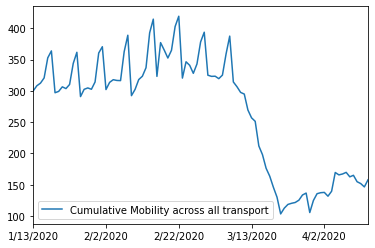

In [11]:
# Lets plot for Germany.
input_region()

    Germany has been hard hit by COVID 19. As of 21st April, there are 147,103 cases and around 5000 deaths. Due to an excellent countrywide Medical and Health 
    care system, Germany also happens to have the highest recovery rate among top hard hit countries by COVID19.
    
> Germany government had declared a nationwide curfew on 22nd of March, however strict measures on people's movements already began being taken around 10th March. The same is clearly evident from our plot. The cumulative mobility across Germany looks to be sharply falling down staring around 12th March. As of now, German government ahs started loosening the lockdown restrictions as the country marches towards, what appears to be a stability in daily cases. The same is again evident from the plot, of late in april mobility has again begun picking up.

### Now lets also work on plots for mobility across transport types

In [12]:
apple.transportation_type.value_counts()

walking    152
driving    152
transit     91
Name: transportation_type, dtype: int64

Note from above that all the 152 countries/ regions have data for `driving` and `walking` transportation type, some have `transit` type too.

In [16]:
# defining a function for plotting the transportation_type wise mobility for a given region/country

def plot_mobility_region_trans(region_country_trans):
    apple_mob_trans_wise = apple[apple.region == region_country_trans]
    apple_mob_trans_wise = apple_mob_trans_wise.drop(['region'], axis = 1)
    apple_mob_trans_wise = apple_mob_trans_wise.T

    if len(apple_mob_trans_wise.columns) < 3:
        apple_mob_trans_wise.columns = ['driving', 'walking']
    elif len(apple_mob_trans_wise.columns) == 3:
        apple_mob_trans_wise.columns = ['driving', 'walking', 'transit']
    
    apple_mob_trans_wise = apple_mob_trans_wise[1:]
    apple_mob_trans_wise.plot.line()
    
    
# defining function to take region name input from the user.
    
def input_region_trans():
    print('Which region/country mobility report would you like to see?')
    region_name_trans = input()
    if(region_name_trans in regions):
        print('Below plotted is the mobility report for the region/country: ', region_name_trans)
        plot_mobility_region_trans(region_name_trans)
    else:
        print('Data on this country is not available')
        print('\nWanna see the mobility plots of some other region/country ? Enter `Y` or `N`')
        ques = input()
        if(ques == 'Y'):
            input_region_trans()
        else:
            print('\n\n\nCOVID-19 has spread all across the world. Many countries have adopted lockdown measures in their regions, evident from the plots you saw. Stay Home Stay Safe.')

Lets plot people's mobility for some of the countries/regions and observe how lockdown measures have impacted the region.

Which region/country mobility report would you like to see?
Detroit
Below plotted is the mobility report for the region/country:  Detroit


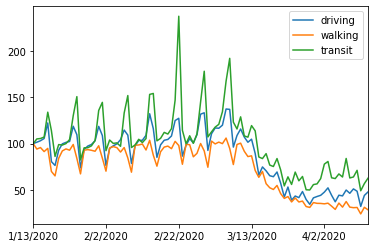

In [17]:
# Lets plot for Detroit, USA
input_region_trans()

    Detroit is best known as the center of the U.S. automobile industry, and the "Big Three" auto manufacturers General Motors, Ford, and Fiat Chrysler are all
    headquartered in Metro Detroit. This industry requires many labors who come from far off places.

> Observe there is a major spike in transit mobility around 22nd Feb. Also throughout February, there was a strong transit mobility. I suppose this high transit mobility must have been due to people taking public transport to move back to their homes (as a panick action) due to sudden strong US government measures to fight COVID 19.

> Other than transit mobility, the mobility via driving or walking are not much and start dying down March onwards.

Which region/country mobility report would you like to see?
Spain
Below plotted is the mobility report for the region/country:  Spain


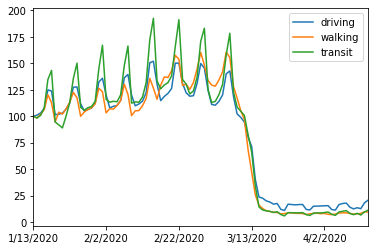

In [18]:
# Lets plot for Spain
input_region_trans()

    Spain is one among the top worst hit countries by COVID 19. As of 21st April there are 204,178 cases in Spain, and more than 20000 deaths.
    
    
>Note how the mobilty was pretty descent until a strict lockdown measures was taken by the 
Spanish Government. Note the dramatic drop around 12th March. This seems to be very much inline with the fact that Spanish Government imposed a nation wide
lockdown on 14th March.

**Similarly the mobility impacts on regions/ countries can be analysed**